## RNN and LSTM
**Recurrent Neural Networks** are a type of neural networks that are designed to work on sequence prediction models. **RNNs** can be used for text data, speech data, classification problems and generative models. Unlike ANNs, RNNs' prediction are based on the past prediction as well as the current input. RNNs are networks with loops in them allowing information to persist.

Each node of an RNN consists of 2 inputs:

- Memory unit
- Event unit
M(t-1) is the memory unit or the output of the previous prediction. E(t) is the current event or the information being provided at the present time. M(t) is the output of the current node or the output at the present time in the sequence.

In this notebook, I'm going to train a very simple **LSTM** model, which is a type of **RNN** architecture to do time series prediction. Given some input data, it should be able to generate a prediction for the next step



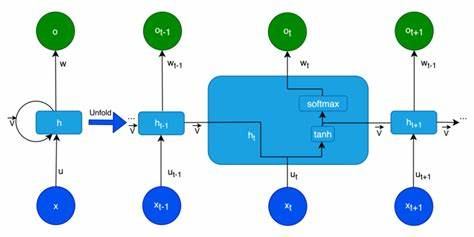


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


## Load data

In [2]:
data = pd.read_csv("D:\META.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,163.029999,165.880005,161.259995,162.440002,162.440002,26407700
1,2018-10-02,161.580002,162.279999,158.669998,159.330002,159.330002,36031000
2,2018-10-03,160.000000,163.660004,159.529999,162.429993,162.429993,23109500
3,2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600
4,2018-10-05,159.210007,160.899994,156.199997,157.330002,157.330002,25744000


## Split train and validation 

In [3]:
lengh_data = len(data)
split_ratio = 0.7
lengh_train = round(lengh_data * split_ratio)
lengh_validation = lengh_data -lengh_train

In [4]:
print('lengh data :',lengh_data )
print('lengh train :', lengh_train)
print('lengh validation :', lengh_validation)

lengh data : 1257
lengh train : 880
lengh validation : 377


In [5]:
train_data = data[:lengh_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2018-10-01,163.029999
1,2018-10-02,161.580002
2,2018-10-03,160.000000
3,2018-10-04,161.460007
4,2018-10-05,159.210007
...,...,...
875,2022-03-23,213.330002
876,2022-03-24,215.000000
877,2022-03-25,220.509995
878,2022-03-28,222.130005


In [6]:
validation_data = data[lengh_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
880,2022-03-30,228.910004
881,2022-03-31,228.449997
882,2022-04-01,224.550003
883,2022-04-04,225.979996
884,2022-04-05,234.080002
...,...,...
1252,2023-09-22,299.299988
1253,2023-09-25,295.640015
1254,2023-09-26,297.660004
1255,2023-09-27,300.450012


In [7]:
dataset_train = train_data.Open.values
dataset_train.shape

(880,)

In [8]:
# reshape
dataset_train = np.reshape(dataset_train,(-1,1))
dataset_train.shape

(880, 1)

In [9]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train_scaled = scaler.fit_transform(dataset_train)

Text(0, 0.5, 'open price')

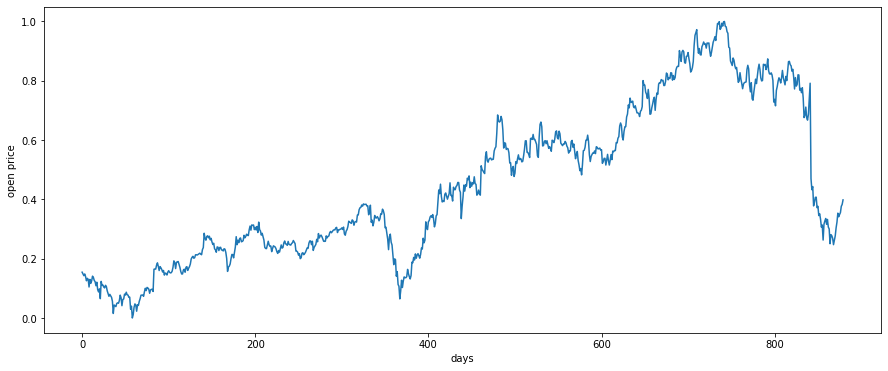

In [10]:
# visualize data
plt.subplots(figsize=(15,6))
plt.plot(dataset_train_scaled)
plt.xlabel('days')
plt.ylabel('open price')

In [11]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, lengh_train):
    # time_step=50, length_train=880, [51-50, 51]
    X_train.append(dataset_train_scaled[i-time_step:i, 0])
    y_train.append(dataset_train_scaled[i, 0])


X_train, y_train = np.array(X_train), np.array(y_train)



In [12]:
X_train.shape

(830, 50)

In [13]:
#reshape and expand dim
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0] ,1))

print(X_train.shape)
print(y_train.shape)

(830, 50, 1)
(830, 1)


## RNN Model Architecture

In [14]:
reg =Sequential()
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True,input_shape=(X_train.shape[1], 1)))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50))
reg.add(Dropout(0.2))


reg.add(Dense(units=1))

## Model Compile

In [15]:
reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = reg.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
26/26 [==============================] - 14s 62ms/step - loss: 0.4134 - accuracy: 0.0024
Epoch 2/100
26/26 [==============================] - 2s 66ms/step - loss: 0.2815 - accuracy: 0.0012
Epoch 3/100
26/26 [==============================] - 1s 49ms/step - loss: 0.2146 - accuracy: 0.0012
Epoch 4/100
26/26 [==============================] - 1s 51ms/step - loss: 0.1955 - accuracy: 0.0012
Epoch 5/100
26/26 [==============================] - 1s 49ms/step - loss: 0.1536 - accuracy: 0.0012
Epoch 6/100
26/26 [==============================] - 1s 53ms/step - loss: 0.1308 - accuracy: 0.0024
Epoch 7/100
26/26 [==============================] - 1s 52ms/step - loss: 0.1165 - accuracy: 0.0012
Epoch 8/100
26/26 [==============================] - 1s 52ms/step - loss: 0.0955 - accuracy: 0.0024
Epoch 9/100
26/26 [==============================] - 1s 54ms/step - loss: 0.0901 - accuracy: 0.0024
Epoch 10/100
26/26 [==============================] - 1s 52ms/step - loss: 0.0835 - accuracy: 0.002

In [16]:
y_pred = reg.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)

26/26 [==============================] - 1s 15ms/step


In [17]:
y_train = scaler.inverse_transform(y_train)

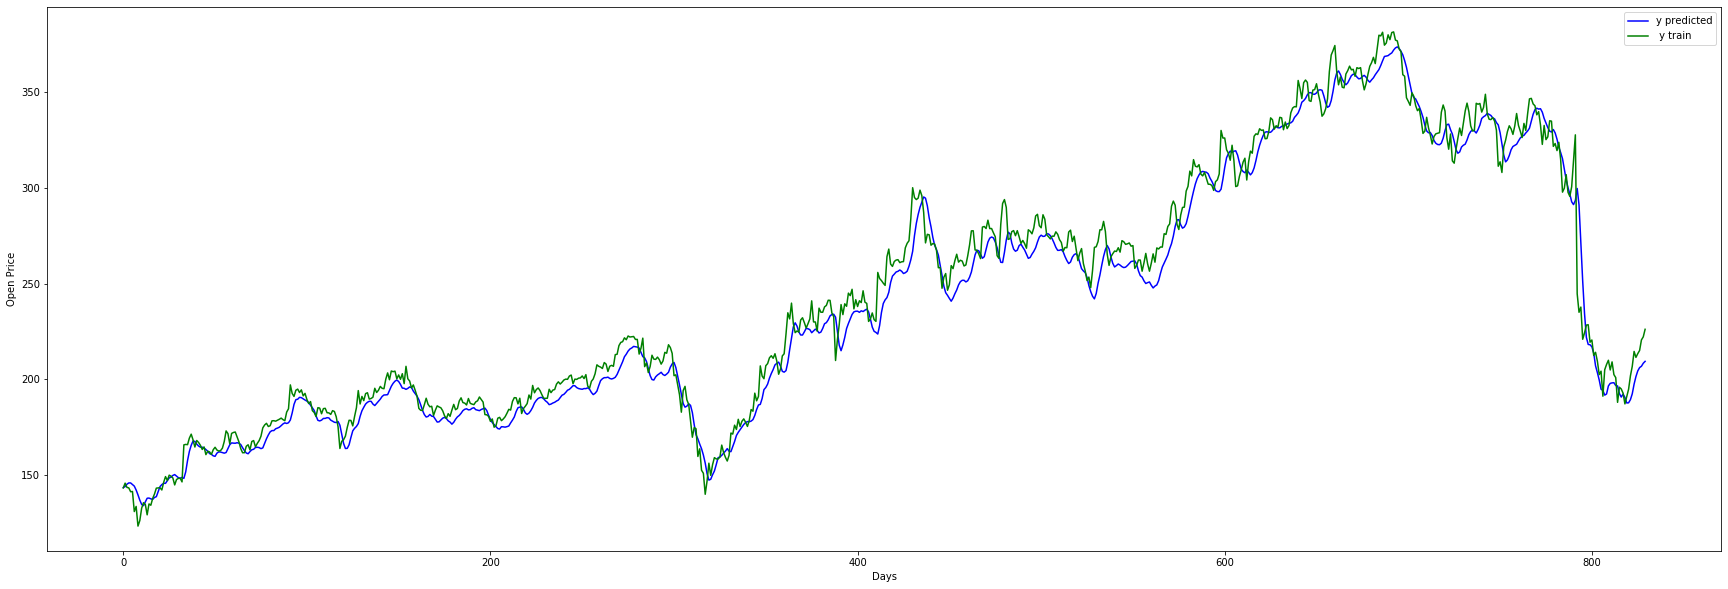

In [18]:
# plot Y_train and Y_pred
plt.figure(figsize=(30, 10))
plt.plot(y_pred, color='b', label='y predicted')
plt.plot(y_train, color = 'g', label = ' y train')

plt.xlabel('Days')
plt.ylabel('Open Price')


plt.legend()

plt.show()

# Evaluate model on validation data

In [19]:
dataset_validation = validation_data.Open.values
dataset_validation = np.reshape(dataset_validation, (-1, 1))
scaled_dataset_validation = scaler.fit_transform(dataset_validation)
scaled_dataset_validation.shape

(377, 1)

In [20]:
y_test = []
X_test = []


for i in range(time_step, lengh_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i, 0])
    y_test.append(scaled_dataset_validation[i, 0])

In [21]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [22]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (-1, 1))

In [23]:
X_test.shape

(327, 50, 1)

In [24]:
y_pred_of_test = reg.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)

11/11 [==============================] - 0s 13ms/step


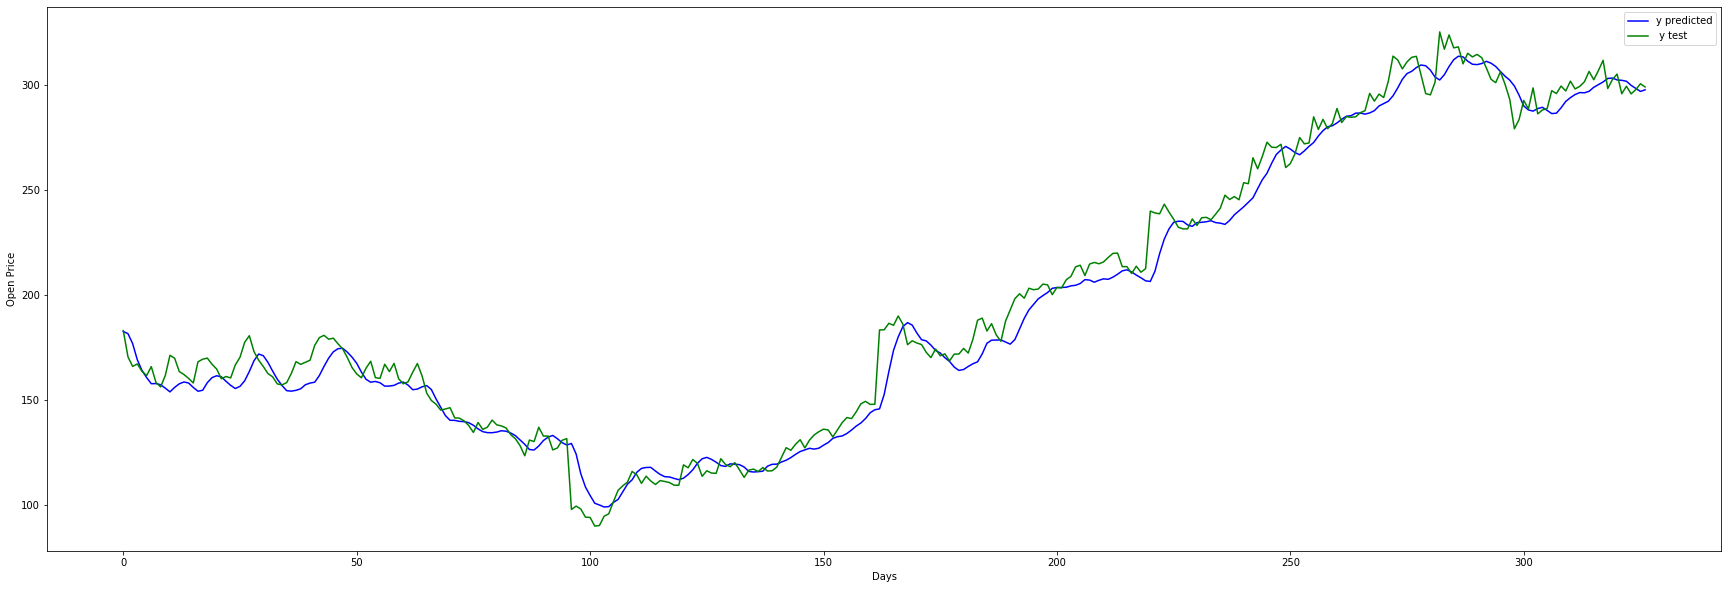

In [25]:
plt.figure(figsize=(30, 10))
plt.plot(y_pred_of_test, color='b', label='y predicted')
plt.plot( scaler.inverse_transform(y_test), color = 'g', label = ' y test')

plt.xlabel('Days')
plt.ylabel('Open Price')


plt.legend()

plt.show()

## LSTM Model Archittecture

In [26]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
hist= model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
26/26 [==============================] - 8s 51ms/step - loss: 61295.2383
Epoch 2/100
26/26 [==============================] - 1s 48ms/step - loss: 51432.0977
Epoch 3/100
26/26 [==============================] - 1s 51ms/step - loss: 41792.8945
Epoch 4/100
26/26 [==============================] - 1s 48ms/step - loss: 32186.4121
Epoch 5/100
26/26 [==============================] - 1s 49ms/step - loss: 23135.7051
Epoch 6/100
26/26 [==============================] - 1s 50ms/step - loss: 15525.5371
Epoch 7/100
26/26 [==============================] - 1s 50ms/step - loss: 10090.2598
Epoch 8/100
26/26 [==============================] - 1s 49ms/step - loss: 6822.8076
Epoch 9/100
26/26 [==============================] - 1s 50ms/step - loss: 5201.5190
Epoch 10/100
26/26 [==============================] - 1s 51ms/step - loss: 4562.2500
Epoch 11/100
26/26 [==============================] - 1s 50ms/step - loss: 4383.6011
Epoch 12/100
26/26 [==============================] - 1s 49ms/step 

In [27]:
X_input=data.iloc[-time_step:].Open.values
X_input = scaler.fit_transform(X_input.reshape(-1, 1))
X_input = np.reshape(X_input, (1, 50, 1))
X_input.shape

(1, 50, 1)

## Predict Open value for next day

In [28]:
simple_RNN_prediction = scaler.inverse_transform(reg.predict(X_input))
simple_RNN_prediction[0, 0]

1/1 [==============================] - 0s 65ms/step


299.13504

In [29]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-09-22,299.299988,305.380005,298.269989,299.079987,299.079987,25351400
1253,2023-09-25,295.640015,300.950012,293.700012,300.829987,300.829987,18987000
1254,2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200
1255,2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800
1256,2023-09-28,298.940002,306.329987,296.700012,303.959991,303.959991,22140800
